To Do
1. Predict the condition of a vehicle based on its features.
2. Plot the most important features.
3. Train multiple classifiers and compare the accuracy.
4. Evaluate the XGBoost model with K-fold cross-validation.

In [14]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
#import the data
raw_data = pd.read_csv('car_evaluation.csv')

In [17]:
raw_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [31]:
raw_data.shape

(1728, 7)

# EDA

In [19]:
#Chect the dataset info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [21]:
raw_data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


In [22]:
raw_data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [38]:
#check for unique values of each column

#raw_data['safety'].unique()
#raw_data['class'].unique()

for i in raw_data.columns:
    print(raw_data[i].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


<AxesSubplot:xlabel='class', ylabel='count'>

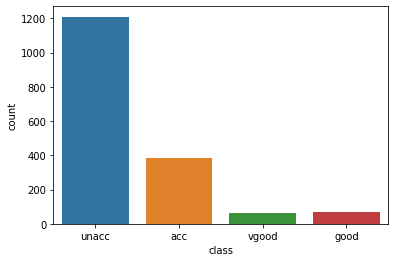

In [47]:
#plot the column "class" distribution
sns.countplot(raw_data['class'])

the dataset is highly unbalance.

In [49]:
#create dummies

#here we are going to use LabelEncoder(the categorical variable are comparable).

from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [54]:
data = raw_data
#transform all columns 
for i in raw_data.columns:
    data[i] = le.fit_transform(raw_data[i])

In [55]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


<AxesSubplot:>

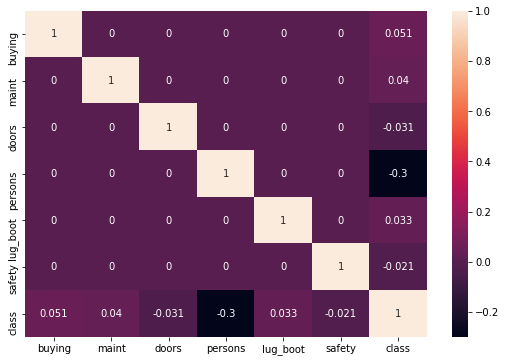

In [60]:
#plot the Correlation matrix
fig=plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True)

# Model Selection¶

In [67]:
X = data.drop(['class'], axis=1)
y = data['class']

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [82]:
#split the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=10)

### 1. Logistic Regression¶

In [72]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()

In [76]:
logis_reg.fit(X_train, y_train)
y_predict = logis_reg.predict(X_test)

accuracy_score(y_predict, y_test)

0.6955684007707129

In [77]:
confusion_matrix(y_predict, y_test)

array([[ 19,   3,  30,   8],
       [  0,   0,   0,   0],
       [ 78,  18, 339,  14],
       [  5,   0,   2,   3]])

In [84]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.19      0.32      0.23        60
           1       0.00      0.00      0.00         0
           2       0.91      0.76      0.83       449
           3       0.12      0.30      0.17        10

    accuracy                           0.70       519
   macro avg       0.31      0.34      0.31       519
weighted avg       0.81      0.70      0.75       519



### 2. KNN Classifier

In [85]:
knn = KNeighborsClassifier(n_jobs=-1)

In [92]:
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy_score(y_predict,y_test)

0.9267822736030829

In [89]:
knn.score(X_test,y_test)

0.9267822736030829

In [93]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.62      0.81      0.70        16
           2       0.99      0.95      0.97       388
           3       0.64      1.00      0.78        16

    accuracy                           0.93       519
   macro avg       0.77      0.90      0.82       519
weighted avg       0.94      0.93      0.93       519



### 3.Random Forests Classifie

In [108]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,random_state=10)

In [97]:
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.9807321772639692


### 4.XGBoost

In [109]:
from xgboost import XGBClassifier
from sklearn import model_selection

xgb = XGBClassifier()

In [117]:
seed = 7
num_trees = 50

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=num_trees,random_state=seed)

results = cross_val_score(model,X_train,y_train, cv=kfold)


In [127]:
acc = results.mean()*100

print(f'With XGBoost the accuracy is: {acc:.2f}% .')

With XGBoost the accuracy is: 98.10% .
